In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
electricity_df = pd.read_csv('C:/Users/Cruzer/QMST5336/Project/electricity_price.csv', index_col=0)

gas_df = pd.read_csv('C:/Users/Cruzer/QMST5336/Project/gas_price.csv', index_col=0)
display(electricity_df,gas_df)

,Date,electricity_price,Unnamed: 3
DATE,,,
1/1/1992,1/1/1992,0.062,NaN
2/1/1992,2/1/1992,0.062,NaN
3/1/1992,3/1/1992,0.062,NaN
4/1/1992,4/1/1992,0.062,NaN
5/1/1992,5/1/1992,0.079,NaN
...,...,...,...
8/1/2021,8/1/2021,0.144,NaN
9/1/2021,9/1/2021,0.152,NaN
10/1/2021,10/1/2021,0.153,NaN


,Date,gas_price
DATE,,
01-01-1992,01-01-1992,0.720
02-01-1992,02-01-1992,0.706
03-01-1992,03-01-1992,0.722
04-01-1992,04-01-1992,0.714
05-01-1992,05-01-1992,0.744
...,...,...
08-01-2021,08-01-2021,1.695
09-01-2021,09-01-2021,1.698
10-01-2021,10-01-2021,1.870


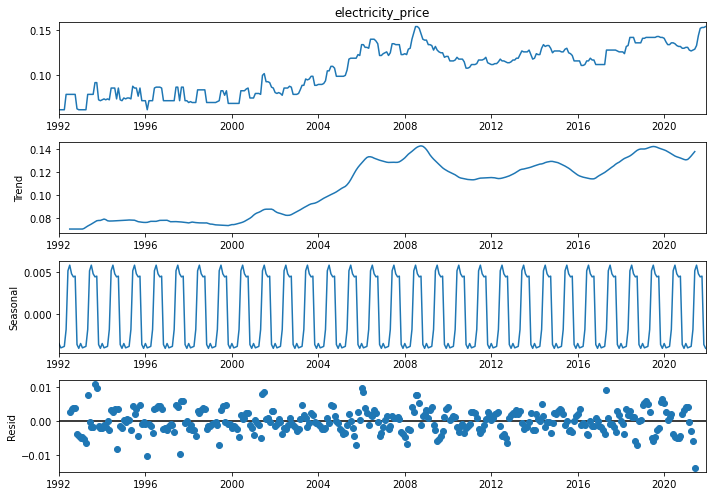

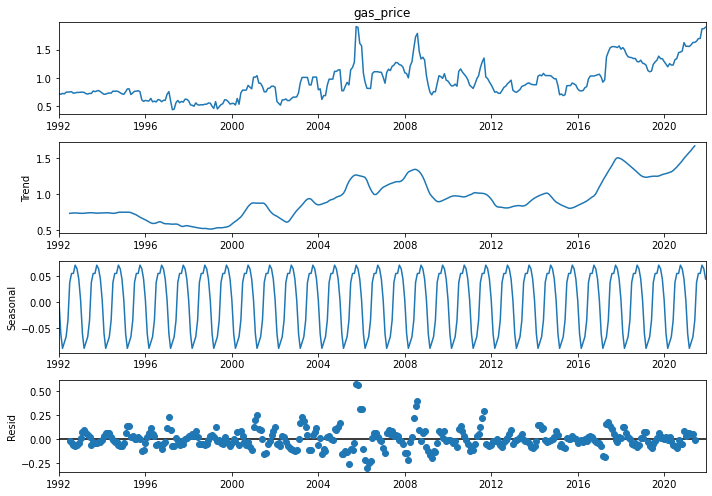

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decompose_time_series(series):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive')
    result.plot()
    
    #pyplot.show()
#Execute in the main block
#Convert the Date column into a date object
electricity_df['Date']=pd.to_datetime(electricity_df['Date'])
#Set Date as a Pandas DatetimeIndex
electricity_df.index=pd.DatetimeIndex(electricity_df['Date'])
#Decompose the time series into parts
plt.rcParams.update({'figure.figsize': (10,7)}) 
decompose_time_series(electricity_df['electricity_price'])


gas_df['Date']=pd.to_datetime(gas_df['Date'])
#Set Date as a Pandas DatetimeIndex
gas_df.index=pd.DatetimeIndex(gas_df['Date'])
#Decompose the time series into parts
plt.rcParams.update({'figure.figsize': (10,7)}) 
decompose_time_series(gas_df['gas_price'])

In [18]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

In [19]:
electricity_series = electricity_df['electricity_price']
gas_series = gas_df['gas_price']

In [20]:
electricity_historic = electricity_series.iloc[:int(len(electricity_series) * 0.3)]
electricity_test = electricity_series.iloc[int(len(electricity_series) * 0.3):]

gas_historic = gas_series.iloc[:int(len(gas_series) * 0.3)]
gas_test = gas_series.iloc[int(len(gas_series) * 0.3):]

In [21]:
type(electricity_historic)

pandas.core.series.Series

In [22]:
type(gas_historic)

pandas.core.series.Series

In [23]:
electricity_historic = electricity_historic.to_list()
type(electricity_historic)

list

In [24]:
gas_historic = gas_historic.to_list()
type(gas_historic)

list

In [25]:
electricity_predictions = []
for i in range(len(electricity_test)):
    electricty_sel = ar_select_order(electricity_historic, 13, old_names=False)
    electricty_sel.ar_lags
    electricity_model_fit = electricty_sel.model.fit()
    electricty_pred = electricity_model_fit.predict(start=len(electricity_historic), end=len(electricity_historic), dynamic=False)
    electricity_predictions.append(electricty_pred[0])
    electricity_historic.append(electricity_test[i])
electricity_cross_val = pd.Series(electricity_predictions, index=electricity_test.index)

In [26]:
gas_predictions = []
for i in range(len(gas_test)):
    gas_sel = ar_select_order(gas_historic, 13, old_names=False)
    gas_sel.ar_lags
    gas_model_fit = gas_sel.model.fit()
    gas_pred = gas_model_fit.predict(start=len(gas_historic), end=len(gas_historic), dynamic=False)
    gas_predictions.append(gas_pred[0])
    gas_historic.append(gas_test[i])
gas_cross_val = pd.Series(gas_predictions, index=gas_test.index)

In [27]:
electricty_test_score = mean_squared_error(electricity_test, electricity_cross_val, squared = False)
#squared: bool, default=True
#If True returns MSE value, if False returns RMSE value.
print(electricty_test_score)

0.004128209535927657


In [28]:
gas_test_score = mean_squared_error(gas_test, gas_cross_val, squared = False)
#squared: bool, default=True
#If True returns MSE value, if False returns RMSE value.
print(gas_test_score)

0.10592575386015732


In [29]:
type(electricity_cross_val)

pandas.core.series.Series

In [30]:
type(gas_cross_val)

pandas.core.series.Series

In [31]:
electricity_cross_val.head()

Date
2001-01-01    0.070623
2001-02-01    0.069666
2001-03-01    0.071931
2001-04-01    0.074080
2001-05-01    0.076436
dtype: float64

In [32]:
gas_cross_val.head()

Date
2001-01-01    0.787616
2001-02-01    0.983701
2001-03-01    0.986581
2001-04-01    1.015731
2001-05-01    0.884786
dtype: float64

In [33]:
electricity_test

Date
2001-01-01    0.075
2001-02-01    0.080
2001-03-01    0.080
2001-04-01    0.080
2001-05-01    0.079
              ...  
2021-08-01    0.144
2021-09-01    0.152
2021-10-01    0.153
2021-11-01    0.153
2021-12-01    0.154
Name: electricity_price, Length: 252, dtype: float64

In [34]:
gas_test

Date
2001-01-01    1.011
2001-02-01    1.011
2001-03-01    1.037
2001-04-01    0.905
2001-05-01    0.902
              ...  
2021-08-01    1.695
2021-09-01    1.698
2021-10-01    1.870
2021-11-01    1.871
2021-12-01    1.898
Name: gas_price, Length: 252, dtype: float64

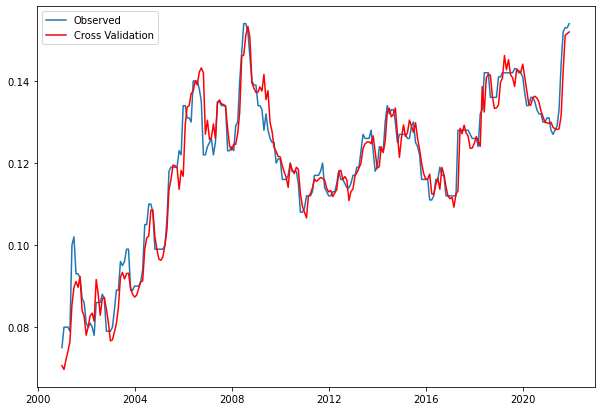

In [35]:
#Plot for Electricity data
plt.plot(electricity_test, label='Observed')
plt.plot(electricity_cross_val, color='red', label='Cross Validation')
plt.legend()
plt.show()

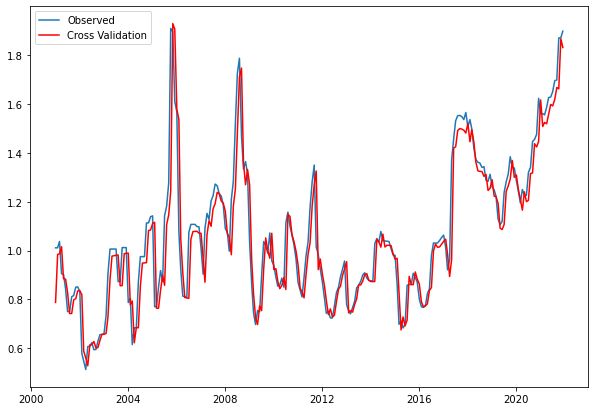

In [36]:
#Plot for Gas data
plt.plot(gas_test, label='Observed')
plt.plot(gas_cross_val, color='red', label='Cross Validation')
plt.legend()
plt.show()

In [43]:
electricity_historic = electricity_series
#prediction for the next 52 weeks (5 year)
electricity_pred = 260
#the future weeks starts on 2018-10-07, because the last existing data ends on 2018-09-30
electricity_date_pred = pd.date_range("2021-12-01", periods=electricity_pred, freq="w")

electricity_sel = ar_select_order(electricity_historic, 13, glob = True, seasonal = True, old_names=False)
electricity_sel.ar_lags
electricity_model_fit = electricity_sel.model.fit()
electricity_pred = electricity_model_fit.predict(start=len(electricity_historic), end=len(electricity_historic) + electricity_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))

C:\Users\Cruzer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Cruzer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [44]:
electricity_predictions = pd.Series(electricity_pred.values, index=electricity_date_pred)

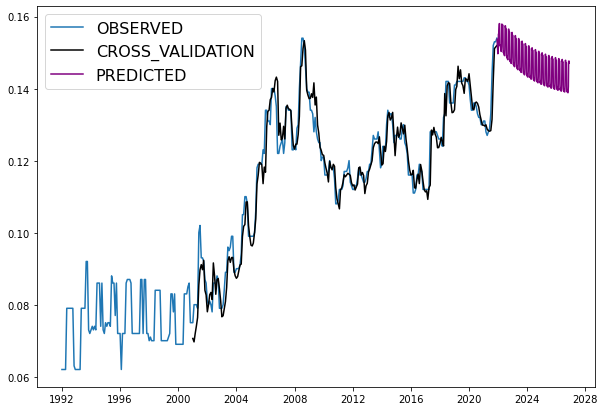

In [45]:
# Electricity plot results
plt.plot(electricity_series, label='OBSERVED')
plt.plot(electricity_cross_val, color='black', label='CROSS_VALIDATION')
plt.plot(electricity_predictions, color='purple', label='PREDICTED')
plt.legend(fontsize = 16)
plt.show()

In [46]:
gas_historic = gas_series
#prediction for the next 52 weeks (5 year)
gas_pred = 260
#the future weeks starts on 2018-10-07, because the last existing data ends on 2018-09-30
gas_date_pred = pd.date_range("2021-12-01", periods=gas_pred, freq="w")

gas_sel = ar_select_order(gas_historic, 13, glob = True, seasonal = True, old_names=False)
gas_sel.ar_lags
gas_model_fit = gas_sel.model.fit()
gas_pred = gas_model_fit.predict(start=len(gas_historic), end=len(gas_historic) + gas_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))

C:\Users\Cruzer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Cruzer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [47]:
gas_predictions = pd.Series(gas_pred.values, index=gas_date_pred)

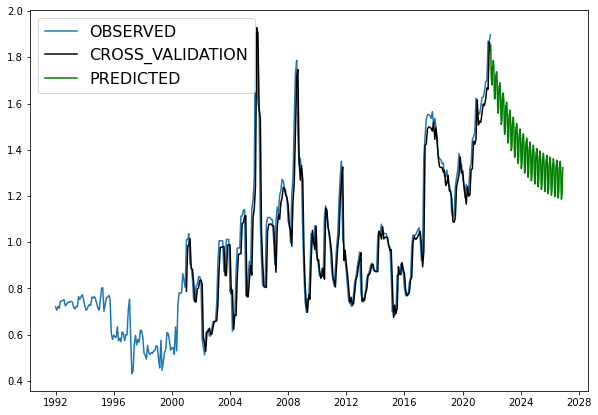

In [48]:
# Gas plot results
plt.plot(gas_series, label='OBSERVED')
plt.plot(gas_cross_val, color='black', label='CROSS_VALIDATION')
plt.plot(gas_predictions, color='Green', label='PREDICTED')
plt.legend(fontsize = 16)
plt.show()